In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import re
import h5py
from six.moves import range

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

In [2]:
from MnvReaderSQLite import MnvCategoricalSQLiteReader

In [3]:
def make_plots_raw(arr, plot_type, colormap='Reds'):
    """
    plots and text for confusion matrices
    """
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(1, 2)

    def make_title_string(title, logscale):
        title = r'Log$_{10}$ ' + title if logscale else title
        return title
    
    def make_subplot(ax, show_arr, colormap, title):
        im = ax.imshow(show_arr, cmap=plt.get_cmap(colormap), interpolation='nearest', origin='lower')
        cbar = plt.colorbar(im, fraction=0.04)
        plt.title(title)
        plt.xlabel('Softmax probabilties')
        plt.ylabel('Predicted segment')
        
    # linear plots
    ax = plt.subplot(gs[0])
    show_arr = arr
    make_subplot(ax, show_arr, colormap, make_title_string('Probabilities', False))

    # log plots
    ax = plt.subplot(gs[1])
    show_arr = np.log10(arr * 100.0)
    make_subplot(ax, show_arr, colormap, make_title_string('Probabilities', True))
    
    fig.savefig('reco_probabilities_{}.pdf'.format(plot_type), bbox_inches='tight')

In [4]:
def make_diff_plots_raw(arr1, arr2, plot_type, colormap='Reds'):
    """
    plots and text for confusion matrices
    """
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(1, 2)
    arr = arr1 - arr2

    def make_title_string(title, logscale):
        title = r'Log$_{10}$ ' + title if logscale else title
        return title
    
    def make_subplot(ax, show_arr, colormap, title):
        im = ax.imshow(show_arr, cmap=plt.get_cmap(colormap), interpolation='nearest', origin='lower')
        cbar = plt.colorbar(im, fraction=0.04)
        plt.title(title)
        plt.xlabel('True z-segment')
        plt.ylabel('Reconstructed z-segment')
        
    # linear plots
    ax = plt.subplot(gs[0])
    show_arr = arr
    make_subplot(ax, show_arr, colormap, make_title_string('Differences', False))
    
    fig.savefig('differences_raw_{}.pdf'.format(plot_type), bbox_inches='tight')

In [5]:
def make_single_scatters_by_target(arr, plot_type):
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(2, 3)
    
    idcs = np.arange(67)    
    ids = zip(range(5), [9, 18, 27, 44, 49])
    
    for id in ids:
        ax = plt.subplot(gs[id[0]])
        tmparr = arr[:,id[1]]
        tmparr = tmparr / np.max(tmparr)
        plt.scatter(idcs, tmparr)
        #plt.ylim([-0.001, 0.009])

In [6]:
def make_scatters_by_target_ratio(arr1, arr2, plot_type):
    idcs = np.arange(67)
    ids = zip(range(5), [9, 18, 27, 44, 49])
    
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(2, 3)    
    for id in ids:
        ax = plt.subplot(gs[id[0]])
        tmparr1 = arr1[:,id[1]]
        #tmparr1 = tmparr1 / np.max(tmparr1)
        tmparr2 = arr2[:,id[1]]
        #tmparr2 = tmparr2 / np.max(tmparr2)
        tmparr = tmparr1 / tmparr2
        plt.scatter(idcs, tmparr)
        #plt.ylim([-0.001, 0.009])

In [7]:
def make_scatters_by_target_same(arr1, arr2, plot_type):
    idcs = np.arange(67)
    ids = zip(range(5), [9, 18, 27, 44, 49])
            
    fig = plt.figure(figsize=(16,16))
    gs = plt.GridSpec(2, 3)        
    for id in ids:
        ax = plt.subplot(gs[id[0]])
        tmparr1 = arr1[:,id[1]]
        #tmparr1 = tmparr1 / np.max(tmparr1)
        tmparr2 = arr2[:,id[1]]
        #tmparr2 = tmparr2 / np.max(tmparr2)
        plt.scatter(idcs, tmparr1, c='g')
        plt.scatter(idcs, tmparr2, c='r')
        #plt.ylim([-0.001, 0.009])

In [8]:
DBDIR = '/Users/perdue/Documents/MINERvA/AI/theano/predictions'
MCDB = DBDIR + '/' + 'prediction67_me1Amc_epsilon1480703388'
DATADB = DBDIR + '/' + 'prediction67_me1Adata_epsilon1480703388'

In [9]:
reader_mc = MnvCategoricalSQLiteReader(67, MCDB)
reader_data = MnvCategoricalSQLiteReader(67, DATADB)

In [10]:
reader_mc.get_argmax_prediction(117200, 1, 10, 1)

6

In [11]:
reader_mc.read_record(117200, 1, 10, 1)

[(1, 117200, 1, 10, 1, 6, 0.00010858808746480794, 0.0004287932533767384, 0.0015524554530774212, 0.005482828128914863, 0.016857968796242368, 0.2544161927647897, 0.7117803909446575, 0.00796995256240546, 0.0005517380631912177, 0.0008489131312961546, 9.419049285215235e-07, 3.8265340213402475e-08, 5.205979812620605e-07, 1.12427307957966e-08, 4.55437073585158e-09, 4.350692758784501e-09, 9.48631790016438e-09, 4.4599847907364623e-10, 4.259771302895573e-09, 8.729227451698596e-10, 2.753935000153996e-10, 4.876233603421149e-10, 9.072048333062541e-11, 3.8148553895762187e-11, 2.349400835027777e-11, 8.18706694275834e-11, 1.603637846974013e-09, 9.985316884596106e-10, 2.369906150322548e-10, 4.127236650923951e-10, 3.012992918809576e-08, 5.122654501151177e-08, 6.049002989270802e-09, 4.838851910989585e-10, 6.025132712347433e-10, 4.0407846644239997e-10, 4.4626635621357363e-10, 4.1093250766220205e-09, 3.5659373237147307e-08, 1.2891687566676341e-08, 3.2708854264995303e-10, 6.798519021154429e-11, 4.3146019380

In [12]:
reader_mc.read_record_by_id(1)

[(1, 117200, 1, 10, 1, 6, 0.00010858808746480794, 0.0004287932533767384, 0.0015524554530774212, 0.005482828128914863, 0.016857968796242368, 0.2544161927647897, 0.7117803909446575, 0.00796995256240546, 0.0005517380631912177, 0.0008489131312961546, 9.419049285215235e-07, 3.8265340213402475e-08, 5.205979812620605e-07, 1.12427307957966e-08, 4.55437073585158e-09, 4.350692758784501e-09, 9.48631790016438e-09, 4.4599847907364623e-10, 4.259771302895573e-09, 8.729227451698596e-10, 2.753935000153996e-10, 4.876233603421149e-10, 9.072048333062541e-11, 3.8148553895762187e-11, 2.349400835027777e-11, 8.18706694275834e-11, 1.603637846974013e-09, 9.985316884596106e-10, 2.369906150322548e-10, 4.127236650923951e-10, 3.012992918809576e-08, 5.122654501151177e-08, 6.049002989270802e-09, 4.838851910989585e-10, 6.025132712347433e-10, 4.0407846644239997e-10, 4.4626635621357363e-10, 4.1093250766220205e-09, 3.5659373237147307e-08, 1.2891687566676341e-08, 3.2708854264995303e-10, 6.798519021154429e-11, 4.3146019380

In [13]:
reader_mc.read_record_by_id(1)[0][0:6]

(1, 117200, 1, 10, 1, 6)

In [14]:
len(reader_mc.read_record_by_id(1)[0][6:])

67

In [15]:
np.sum(reader_mc.read_record_by_id(1)[0][6:])

1.0

In [16]:
n_evt = 250000

/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide
/Users/perdue/miniconda2/envs/py2mnv_pda/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in divide


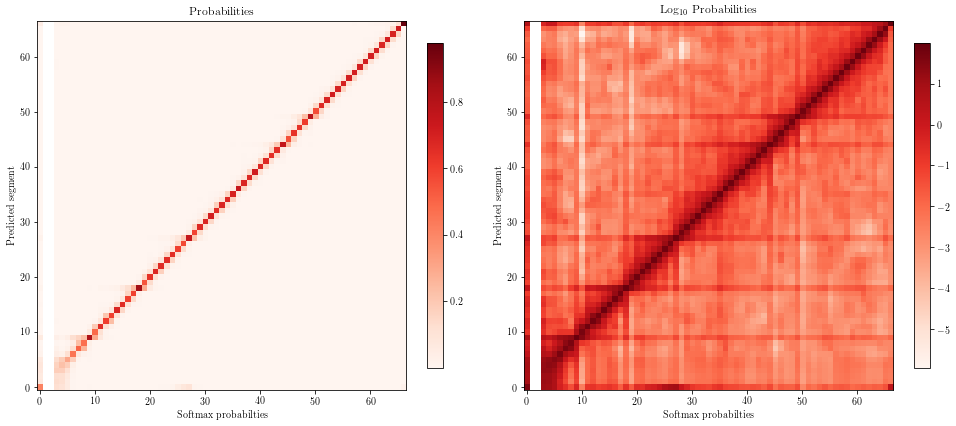

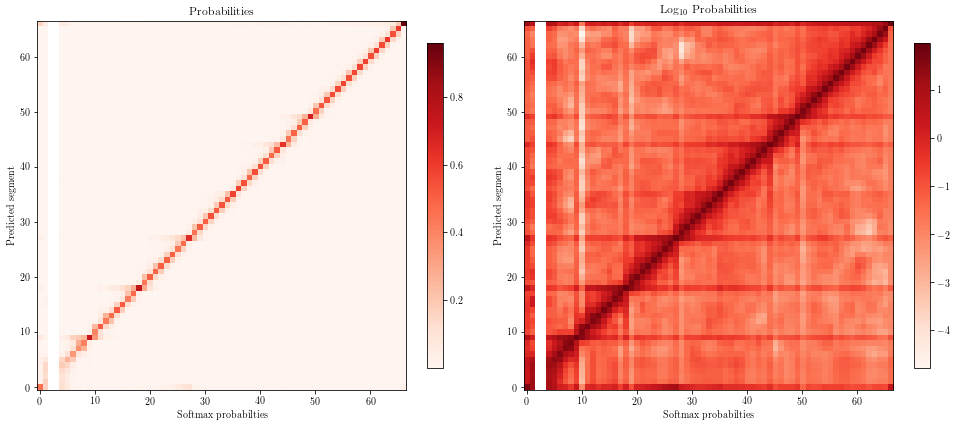

In [17]:
results_mc = np.zeros((67, 67))

#sqlite> select count(*) from zsegment_prediction;
#6661231
#sqlite> select max(id) from zsegment_prediction;
#6661231

for i in range(n_evt):
    id = i + 1
    fetched = reader_mc.read_record_by_id(id)[0]
    segment = fetched[5]
    results_mc[:,segment] += fetched[6:]
    
shp = np.shape(results_mc)
for i in range(shp[1]):
    s = np.sum(results_mc[:,i])
    results_mc[:,i] = results_mc[:,i] / s

make_plots_raw(results_mc, 'mc')

results_data = np.zeros((67, 67))

#sqlite> select max(id) from zsegment_prediction;
#957109

for i in range(n_evt):
    id = i + 1
    fetched = reader_data.read_record_by_id(id)[0]
    segment = fetched[5]
    results_data[:,segment] += fetched[6:]
    
shp = np.shape(results_data)
for i in range(shp[1]):
    s = np.sum(results_data[:,i])
    results_data[:,i] = results_data[:,i] / s

make_plots_raw(results_data, 'data')

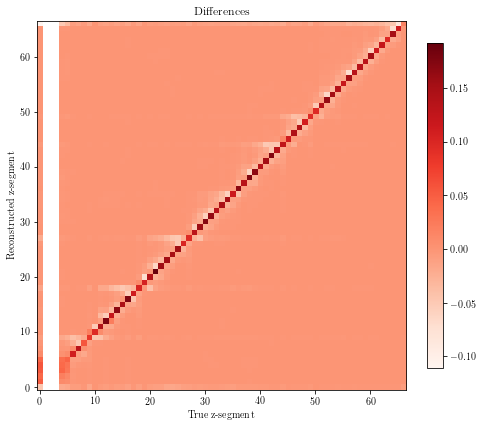

In [18]:
make_diff_plots_raw(results_mc, results_data, 'mc_minus_data')

Max probability normalized vectors for the events that had the targets as their max softmax value for MC:

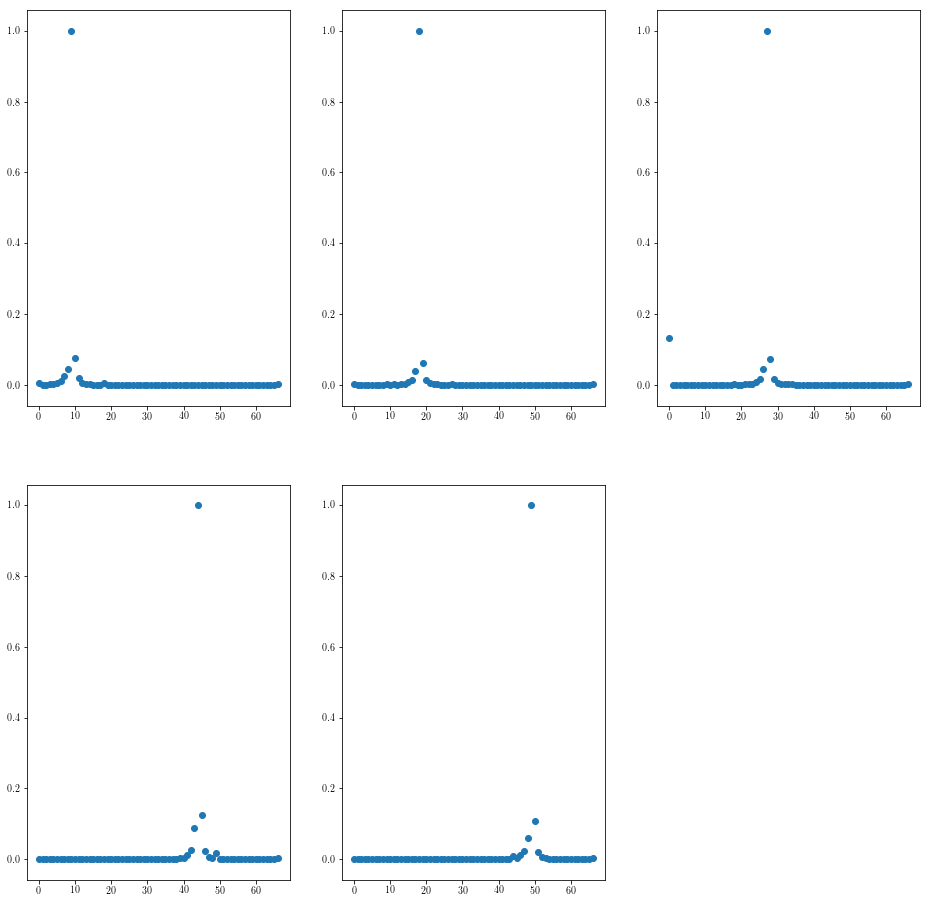

In [19]:
make_single_scatters_by_target(results_mc, 'mc')

Max probability normalized vectors for the events that had the targets as their max softmax value for data:

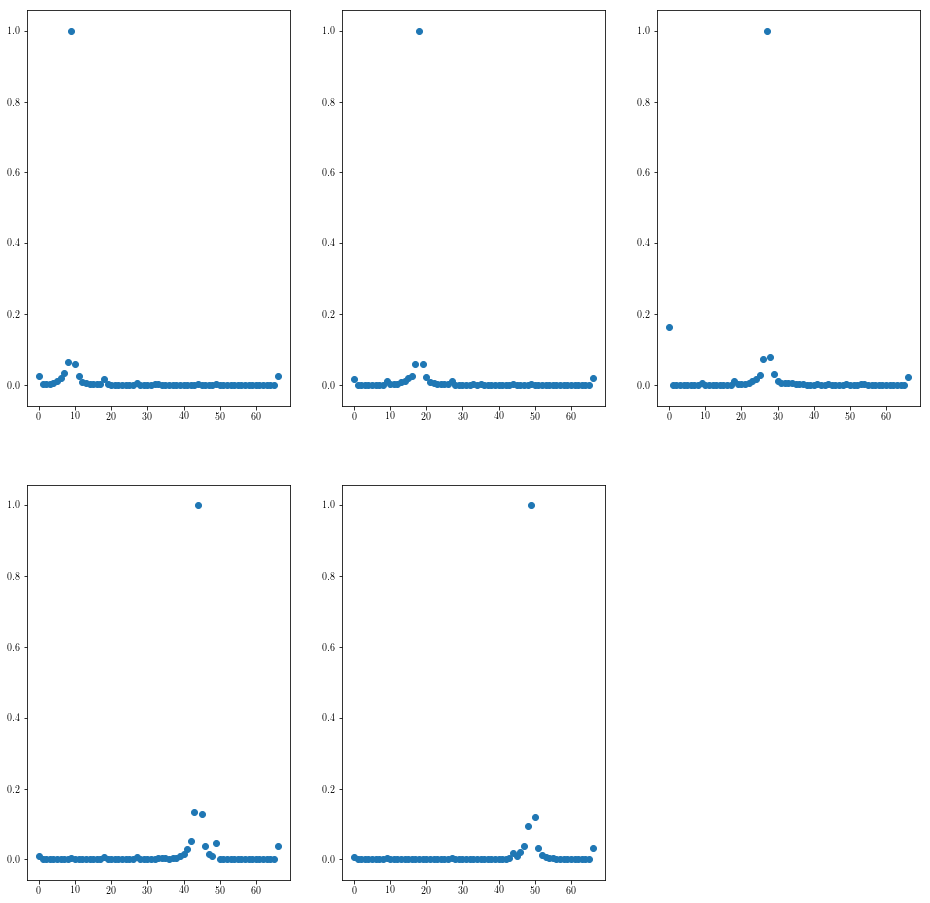

In [20]:
make_single_scatters_by_target(results_data, 'data')

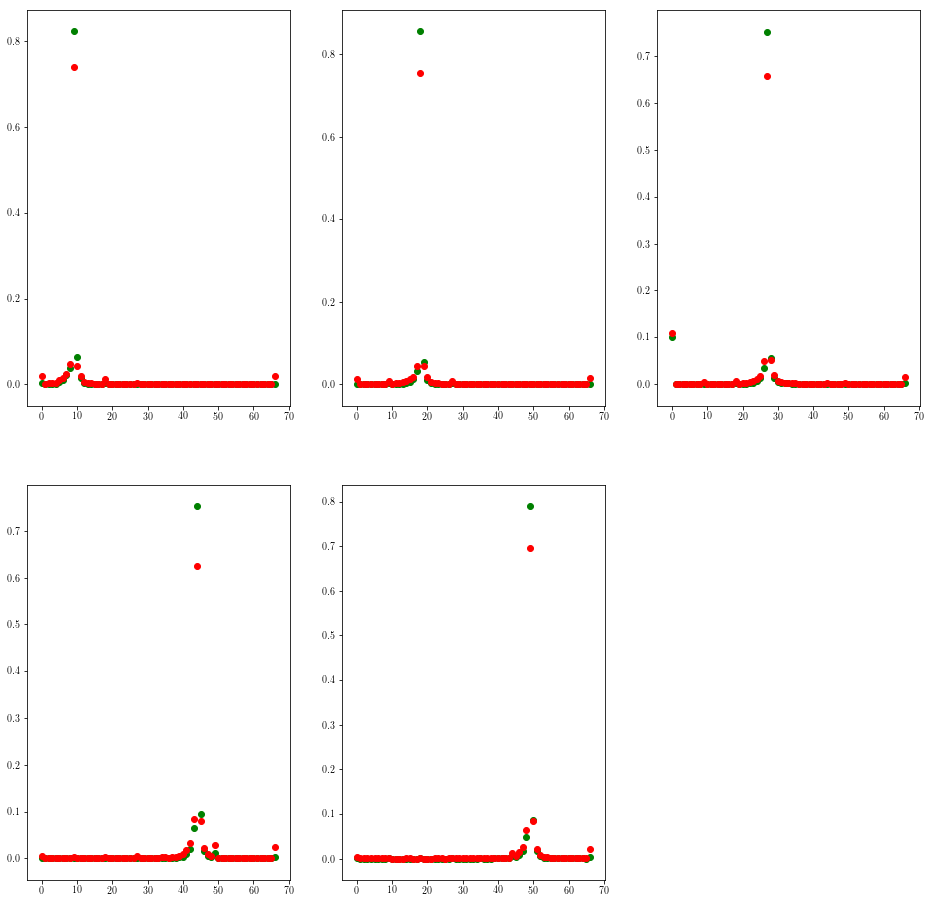

In [21]:
make_scatters_by_target_same(results_mc, results_data, 'scatters')

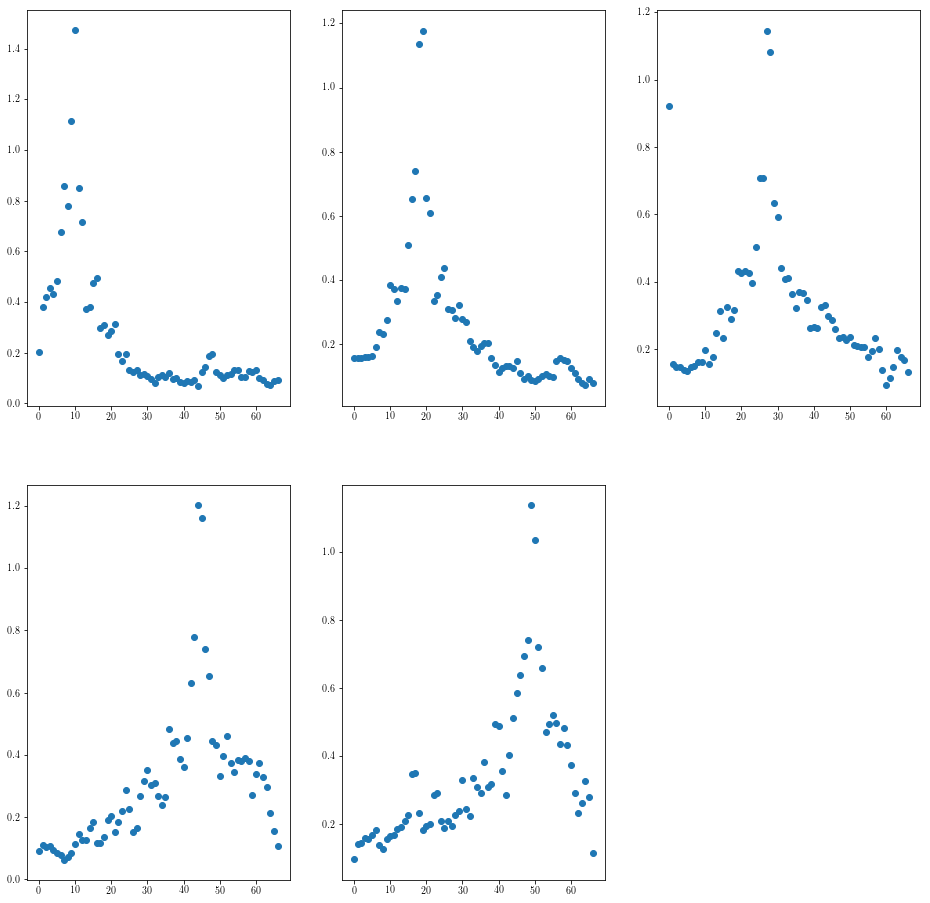

In [22]:
make_scatters_by_target_ratio(results_mc, results_data, 'scatters')